In [1]:
# import pandas, numpy, seaborn, matplotlib
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# delete first 6 row and the last row in the file, no column names
df = pd.read_csv('grady_data.csv', skiprows=6, skipfooter=1, engine='python', header=None)

#in column 2 convert str to int, for strings that do not convert to int, drop them
#df = df[df[2].str.isnumeric()]
#df = df[df[2].astype(int) > 1710900026125] 
# remove all rows where 2 column is not in a unix timestamp format
#df = df[df[2].str.len() == 13]

# drop all rows were row 0 has following values: dc8f1dd, 1fd412a7, 13ea52f5, 75f04b, 2a7af57, 2b2e2c5b, 15479c28, 1e3784ca, 20b01869, 1197dcb6, 1ef922d, 1c567b1c, 1182c243, 2d810d2a, 8db98e8
df = df[~df[0].str.contains('dc8f1dd|1fd412a7|13ea52f5|75f04b|2a7af57|2b2e2c5b|15479c28|1e3784ca|20b01869|1197dcb6|1ef922d|1c567b1c|1182c243|2d810d2a|8db98e8|2b20e4c9')]


In [27]:
#show all rows in dataframes
pd.set_option('display.max_rows', None)

In [33]:
rows, columns = df.shape
print('\n', "Number of rows in dataframe: ", rows, '\n', "Number of columns: ", columns)


 Number of rows in dataframe:  1232 
 Number of columns:  10


In [5]:
# divide df into three subframes based in the value if the column 1, start_df with value s in coulmn 1, attempts_df with value a in column 1, final_df with value f in column 1
start_df = df[df[1] == 's']
attempts_df = df[df[1] == 'a']
final_df = df[df[1] == 'f']

In [6]:
# rename columns in start_df, 0 is "game_id", 1 is "status", 2 is "timestamp", 3 is "player_type", 4 is "game_type", 5 is "tolerance",  6 is "a", 7 is "b", 8 is "c", 9 is "min"
start_df.columns = ["game_id", "status", "timestamp", "player_type", "game_type", "tolerance", "a", "b", "c", "min"]
start_df

,game_id,status,timestamp,player_type,game_type,tolerance,a,b,c,min
0,1ffcdb8c,s,1710728240763,nerd,analytical,1.0,0.866260,9.496443,9.456297,-5.481286
1,8baec6e,s,1710728268542,nerd,analytical,1.0,8.782443,3.850411,-7.338319,-0.219211
2,379e359,s,1710728301386,bird,visual,1.0,9.426379,-9.540173,-8.307089,0.506036
3,3846a291,s,1710728854792,nerd,analytical,1.0,6.611506,6.275085,7.849490,-0.474558
4,2b6d1cab,s,1710729001442,nerd,analytical,2.0,0.771073,-4.126004,2.598522,2.675494
...,...,...,...,...,...,...,...,...,...,...
1263,1e859bb8,s,1712259015414,nerd,visual,1.0,9.371054,-0.410797,-3.227969,0.021918
1268,b955b6e,s,1712259087143,nerd,analytical,3.0,9.138805,-3.666695,9.361578,0.200611
1270,3837ce92,s,1712259445412,nerd,visual,3.0,8.219499,-6.676991,4.574104,0.406168
1272,3837ce92,s,1712259476607,both,analytical,3.0,8.314859,-8.402518,-8.264842,0.505271


In [7]:
# rename columns in attmepts_df, 0 is "game_id", 1 is "status", 2 is "timestamp", 3 is "guess_number", 4 is "x", 5 is "y' and remove 4 last columns
attempts_df = attempts_df.drop(attempts_df.columns[[6, 7, 8, 9]], axis=1)
attempts_df.columns = ["game_id", "status", "timestamp", "guess_number", "x", "y"]


In [8]:
attempts_df

,game_id,status,timestamp,guess_number,x,y
9,1a488b23,a,1710729668263,1,0,5.207127
10,1a488b23,a,1710729670287,2,2,12.181598
11,1a488b23,a,1710729671744,3,0,5.207127
14,2cf63815,a,1710731122451,1,0,-9.632518
15,2cf63815,a,1710731123361,2,1,-14.316497
...,...,...,...,...,...,...
1269,b955b6e,a,1712259201950,1,0.1,9.086296
1271,3837ce92,a,1712259471502,1,1,6.116613
1274,13332b2f,a,1712263328182,1,0,7.003982
1275,13332b2f,a,1712263337943,2,2,3.263151


In [9]:
# in final_df remove 5 last columns and rename remainng columns 1-5 as "game_id","f","timestamp","num_guesses","outcome"
final_df = df[df[1] == 'f']
final_df = final_df.drop(final_df.columns[[5, 6, 7, 8, 9]], axis=1)
final_df.columns = ["game_id", "status", "timestamp", "num_guesses", "outcome"]
final_df

,game_id,status,timestamp,num_guesses,outcome
12,1a488b23,f,1710729675966,3,Alas!
20,2cf63815,f,1710731133436,6,Alas!
26,2a5378f7,f,1710731391453,4,Alas!
37,37d8b85a,f,1710731428261,6,Alas!
60,35147137,f,1710793474461,5,Alas!
...,...,...,...,...,...
1218,2ba052d1,f,1712258284219,14,Hooray!
1232,34952cb2,f,1712258499864,10,Hooray!
1259,1fd4ff39,f,1712258766151,14,Hooray!
1261,269cb2a6,f,1712258772234,13,Hooray!


In [10]:
final_df.shape

(87, 5)

In [11]:
start_df.shape

(184, 10)

In [12]:
# using start_df and final_df, compute average time to solve the game
# merge start_df and final_df on game_id
start_finish_df = pd.merge(start_df, final_df, on='game_id')

In [13]:
# using the merged dataframe, compute the time to solve the game, 
# first cast timestamp_start and timestamp_finish to int, then compute the difference
start_finish_df['timestamp_start'] = start_finish_df['timestamp_x'].astype(int) 
start_finish_df['timestamp_finish'] = start_finish_df['timestamp_y'].astype(int)
start_finish_df['time_to_solve'] = start_finish_df['timestamp_finish'] - start_finish_df['timestamp_start']
# now time_to_solve in milliseconds, convert it to minutes
start_finish_df['time_to_solve'] = start_finish_df['time_to_solve'] / 60000

# limit time_to_solve to 15 minutes
start_finish_df = start_finish_df[start_finish_df['time_to_solve'] < 15]

,game_id,status_x,timestamp_x,player_type,game_type,tolerance,a,b,c,min,status_y,timestamp_y,num_guesses,outcome,timestamp_start,timestamp_finish,time_to_solve
0,1a488b23,s,1710729665423,nerd,visual,1.0,1.476700,0.533835,5.207127,-0.180753,f,1710729675966,3,Alas!,1710729665423,1710729675966,0.175717
1,2cf63815,s,1710731119903,both,visual,1.0,1.816425,-6.500404,-9.632518,1.789340,f,1710731133436,6,Alas!,1710731119903,1710731133436,0.225550
2,2a5378f7,s,1710731380382,bored,visual,1.0,0.926988,8.840395,-4.475358,-4.768342,f,1710731391453,4,Alas!,1710731380382,1710731391453,0.184517
3,37d8b85a,s,1710731418801,nerd,analytical,1.0,3.045540,-2.645075,7.034332,0.434254,f,1710731428261,6,Alas!,1710731418801,1710731428261,0.157667
4,35147137,s,1710793460659,bird,analytical,1.0,1.870346,-0.492488,4.646377,0.131657,f,1710793474461,5,Alas!,1710793460659,1710793474461,0.230033
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82,2ba052d1,s,1712258191884,bored,analytical,2.0,4.661137,4.768356,-9.679895,-0.511501,f,1712258284219,14,Hooray!,1712258191884,1712258284219,1.538917
83,34952cb2,s,1712258363212,bored,visual,1.0,9.833066,-7.990160,-5.519109,0.406290,f,1712258499864,10,Hooray!,1712258363212,1712258499864,2.277533
84,1fd4ff39,s,1712258487380,nerd,visual,3.0,5.502902,1.350745,7.433505,-0.122730,f,1712258766151,14,Hooray!,1712258487380,1712258766151,4.646183
85,269cb2a6,s,1712258695293,nerd,visual,3.0,3.448327,-5.433002,-7.828893,0.787774,f,1712258772234,13,Hooray!,1712258695293,1712258772234,1.282350


In [28]:
start_finish_df

,game_id,status_x,timestamp_x,player_type,game_type,tolerance,a,b,c,min,status_y,timestamp_y,num_guesses,outcome,timestamp_start,timestamp_finish,time_to_solve
0,1a488b23,s,1710729665423,nerd,visual,1.0,1.476700,0.533835,5.207127,-0.180753,f,1710729675966,3,Alas!,1710729665423,1710729675966,0.175717
1,2cf63815,s,1710731119903,both,visual,1.0,1.816425,-6.500404,-9.632518,1.789340,f,1710731133436,6,Alas!,1710731119903,1710731133436,0.225550
2,2a5378f7,s,1710731380382,bored,visual,1.0,0.926988,8.840395,-4.475358,-4.768342,f,1710731391453,4,Alas!,1710731380382,1710731391453,0.184517
3,37d8b85a,s,1710731418801,nerd,analytical,1.0,3.045540,-2.645075,7.034332,0.434254,f,1710731428261,6,Alas!,1710731418801,1710731428261,0.157667
4,35147137,s,1710793460659,bird,analytical,1.0,1.870346,-0.492488,4.646377,0.131657,f,1710793474461,5,Alas!,1710793460659,1710793474461,0.230033
5,37fa9c24,s,1710794343568,both,analytical,1.0,2.988599,-0.683027,-1.259939,0.114272,f,1710794353156,5,Alas!,1710794343568,1710794353156,0.159800
6,3700a6b5,s,1710800163855,nerd,visual,1.0,4.377974,-6.131964,8.119306,0.700320,f,1710800188665,5,Alas!,1710800163855,1710800188665,0.413500
7,a24471,s,1710878187798,both,visual,1.0,3.076030,-5.965105,4.642560,0.969611,f,1710878191293,4,Hooray!,1710878187798,1710878191293,0.058250
8,200cd29f,s,1710887755478,nerd,visual,1.0,0.456252,0.427440,-9.061423,-0.468425,f,1710887823240,9,Hooray!,1710887755478,1710887823240,1.129367
9,39b3687f,s,1710888102971,bird,analytical,3.0,9.010378,4.275865,-2.476699,-0.237274,f,1710888107333,0,Alas!,1710888102971,1710888107333,0.072700


In [14]:
# from start_finish_df, compute the average time to solve the game, using rows where outcome is "Hooray!"
start_finish_wins_df = start_finish_df[start_finish_df['outcome'] == 'Hooray!']
avg_time_to_solve_win = start_finish_wins_df['time_to_solve'].mean()
avg_time_to_solve_win

1.2288646153846154

In [15]:
start_finish_alas_df = start_finish_df[start_finish_df['outcome'] == 'Alas!']
avg_time_to_solve_alas = start_finish_alas_df['time_to_solve'].mean()
avg_time_to_solve_alas

0.43000083333333333

In [29]:
# in start_finish_df, compute the average number of guesses to solve the game where outcome is "Hooray!", cast num_guesses to int
start_finish_wins_df['num_guesses'] = start_finish_wins_df['num_guesses'].astype(int)
avg_num_guesses_win = start_finish_wins_df['num_guesses'].mean()
avg_num_guesses_win

# do the same for outcome "Alas!"
start_finish_alas_df['num_guesses'] = start_finish_alas_df['num_guesses'].astype(int)
avg_num_guesses_alas = start_finish_alas_df['num_guesses'].mean()
avg_num_guesses_alas

print("Average number of guesses to solve the game when outcome is 'Hooray!': ", avg_num_guesses_win)
print("Average number of guesses to solve the game when outcome is 'Alas!': ", avg_num_guesses_alas)

Average number of guesses to solve the game when outcome is 'Hooray!':  9.861538461538462
Average number of guesses to solve the game when outcome is 'Alas!':  4.2


/tmp/ipykernel_77269/2729836892.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  start_finish_wins_df['num_guesses'] = start_finish_wins_df['num_guesses'].astype(int)
/tmp/ipykernel_77269/2729836892.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  start_finish_alas_df['num_guesses'] = start_finish_alas_df['num_guesses'].astype(int)


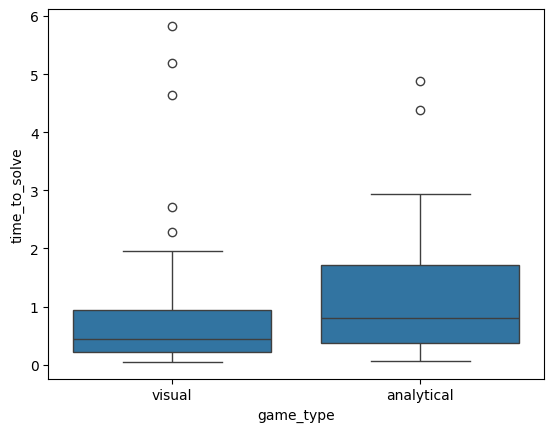

In [25]:
# using start_finish_df, display relationship between time to solve the game and game type
sns.boxplot(x='game_type', y='time_to_solve', data=start_finish_df)
plt.show()

# the plot suggests that games solved using visual methods typically required less time 
# and had less variability in the time to solve than those solved using analytical methods 
# however, both methods have cases where the time to solve was much longer than the average, as indicated by the outliers

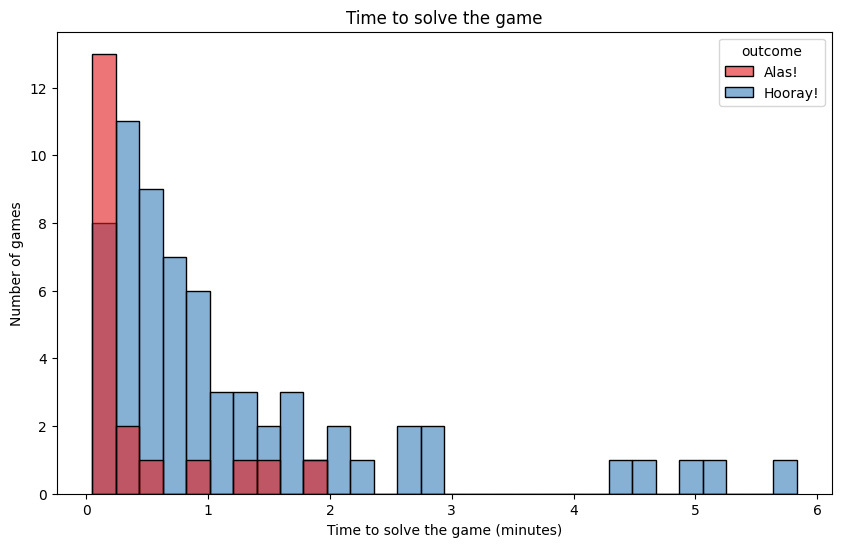

In [18]:
# using start_finish_df plot a histogram of the time to solve the game for both outcomes
plt.figure(figsize=(10, 6))
sns.histplot(data=start_finish_df, x='time_to_solve', hue='outcome', bins=30, alpha=0.6, palette='Set1')
plt.title('Time to solve the game')
plt.xlabel('Time to solve the game (minutes)')
plt.ylabel('Number of games')
plt.show()

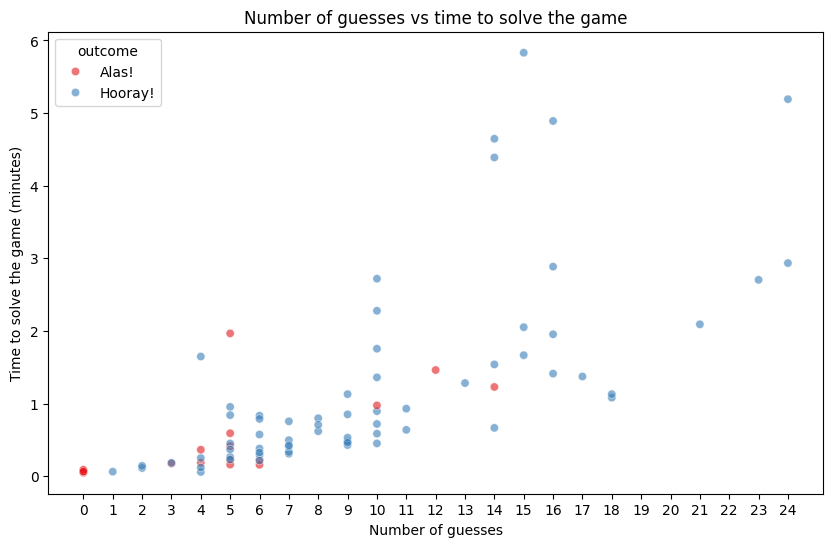

In [19]:
# plot the realtionship between number of guesses and time to solve the game, diffenret colors for different outcomes, cast num_guesses to int, display only round numbers
start_finish_df['num_guesses'] = start_finish_df['num_guesses'].astype(int)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=start_finish_df, x='num_guesses', y='time_to_solve', hue='outcome', alpha=0.6, palette='Set1')
plt.title('Number of guesses vs time to solve the game')
plt.xlabel('Number of guesses')
plt.ylabel('Time to solve the game (minutes)')
# gte maximum number of guesses from start_finish_df
max_guesses = start_finish_df['num_guesses'].max()
plt.xticks(range(0, max_guesses+1, 1))

plt.show()

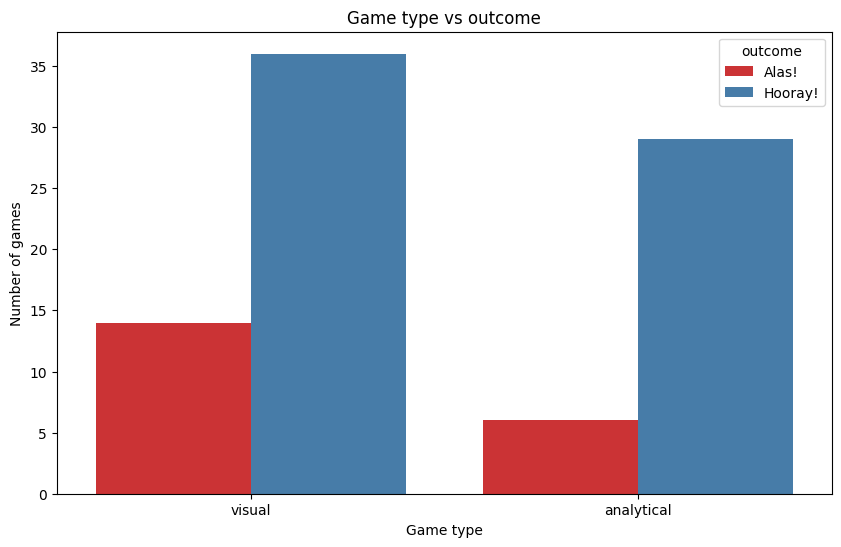

In [20]:
# plot realtionship between game_type and outcomes
plt.figure(figsize=(10, 6))
sns.countplot(data=start_finish_df, x='game_type', hue='outcome', palette='Set1')
plt.title('Game type vs outcome')
plt.xlabel('Game type')
plt.ylabel('Number of games')
plt.show()

Text(0.5, 1.0, 'Player type vs outcome')

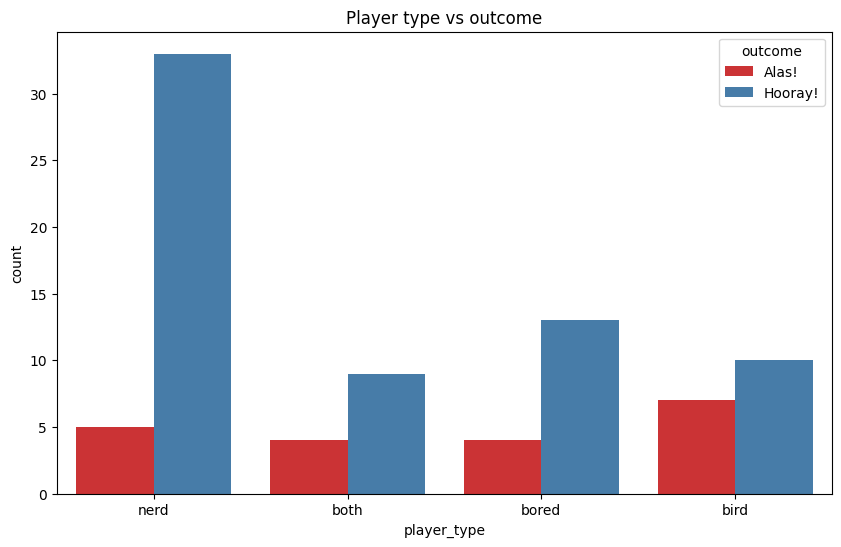

In [21]:
# plot relationship between player_type and outcomes
plt.figure(figsize=(10, 6))
sns.countplot(data=start_finish_df, x='player_type', hue='outcome', palette='Set1')
plt.title('Player type vs outcome')


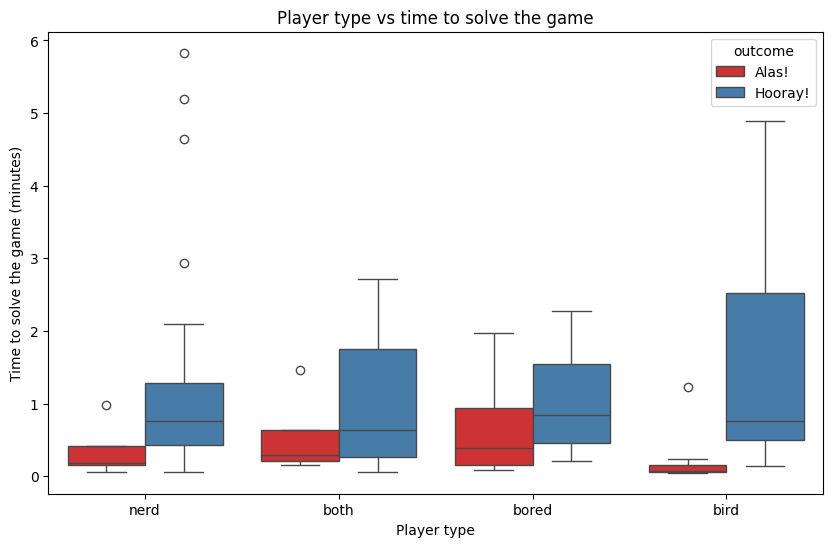

In [26]:
# plot relationship between player type and time to solve the game, hue is outcome
plt.figure(figsize=(10, 6))
sns.boxplot(data=start_finish_df, x='player_type', y='time_to_solve', hue='outcome', palette='Set1')
plt.title('Player type vs time to solve the game')
plt.xlabel('Player type')
plt.ylabel('Time to solve the game (minutes)')
plt.show()

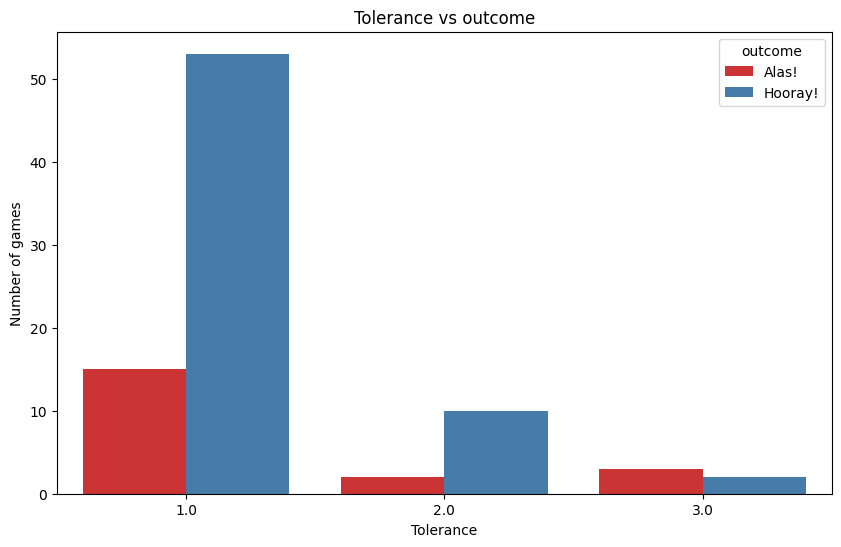

In [22]:
# plot relationship between tolerance and outcomes
plt.figure(figsize=(10, 6))
sns.countplot(data=start_finish_df, x='tolerance', hue='outcome', palette='Set1')
plt.title('Tolerance vs outcome')
plt.xlabel('Tolerance')
plt.ylabel('Number of games')
plt.show()

In [ ]:
from scipy.stats import chi2_contingency


In [ ]:
contingency_table = pd.crosstab(start_finish_df_copy['player_type'], start_finish_df_copy['game_type'])

# Perform the chi-square test with scipy.stats.chi2_contingency
chi2_stat, p_val, dof, ex = chi2_contingency(contingency_table)

# Output the results
chi2_stat, p_val, dof, ex

(2.5742095413664043,
 0.46202889729740393,
 3,
 array([[11.70491803,  9.29508197],
        [ 8.36065574,  6.63934426],
        [ 6.68852459,  5.31147541],
        [ 7.24590164,  5.75409836]]))

In [ ]:
observed_frequencies = pd.crosstab(start_finish_df['player_type'], start_finish_df['game_type'])

# Perform the chi-square test with scipy.stats.chi2_contingency
chi2_stat, p_val, dof, expected_frequencies = chi2_contingency(observed_frequencies)


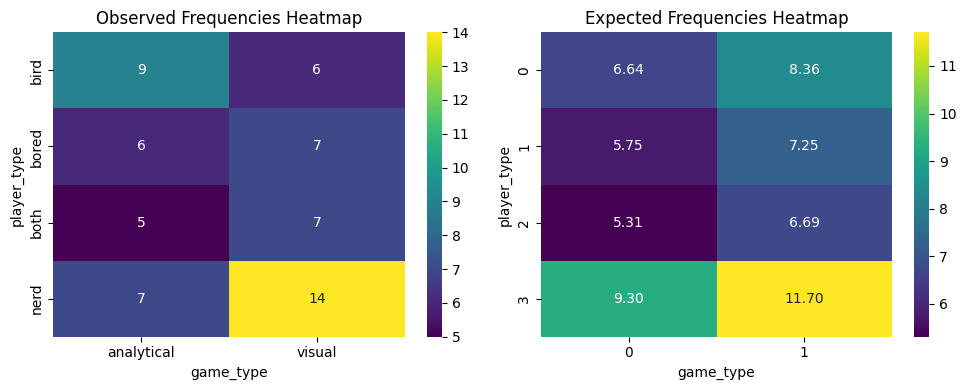

In [ ]:
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
sns.heatmap(observed_frequencies, annot=True, fmt="g", cmap="viridis")
plt.title('Observed Frequencies Heatmap')
plt.ylabel('player_type') # Replace with actual category name
plt.xlabel('game_type') # Replace with actual category name

# Plotting the expected frequencies
plt.subplot(1, 2, 2)
sns.heatmap(expected_frequencies, annot=True, fmt=".2f", cmap="viridis")
plt.title('Expected Frequencies Heatmap')
plt.ylabel('player_type') # Replace with actual category name
plt.xlabel('game_type') # Replace with actual category name

plt.tight_layout()
plt.show()